<a href="https://colab.research.google.com/github/MN589/Data-Science-Portfolio/blob/main/Customer_Segmentation_with_Clustering_Project_Client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer segmentation with clustering Project for E-Commerce Client

## **Business context**

We are provided an e-commerce data set from a real-world organisation to perform customer segmentation with clustering models to improve marketing efforts (SAS, 2024). It is a transnational data set with customers from five continents (Oceania, North America, Europe, Africa, and Asia) and 47 countries.

The data set contains 951,668 rows, each representing a product a customer ordered. The data set contains details about the customer (e.g. location, product type, loyalty member) and order (e.g. days to delivery, delivery date, order date, cost, quantity ordered, profit) based on orders between 1 January 2012 and 30 December 2016.

As each customer is unique, it is critical to identify and/or create new features for customer segmentation to inform marketing efforts. The data set has 20 features you can choose from:
- **Quantity:** The quantity the customer orders (e.g. 1, 2, 3).
- **City:** Name of the customer's residence (e.g. Leinster, Berowra, Northbridge).
- **Continent:** Name of the continent where the customer resides (Oceania, North America).
- **Postal code:** Where the customer resides (e.g. 6437, 2081, 2063).   
State province: State or province where the customer resides (e.g. Western Australia, Quebec, New South Wales).
- **Order date:** The date the order was placed (e.g. 1 January 2012, 20 June 2014).
- **Delivery date:** The date the order was delivered (e.g. 12 April 2014, 19 November 2016).
- **Total revenue:** Total revenue based on ordered items in USD (e.g. 123.80, 85.10).
- **Unit cost:** Cost per unit ordered in USD (e.g. 9.10, 56.90).
- **Discount:** Percentage or normal total retail price (e.g. 50%, 30%).
- **Order type label:** Method in which the order was placed (e.g. internet sale, retail sale).
- **Customer country label:** The country where the customer resides (e.g. Australia, Canada, Switzerland).
- **Customer birthdate:** The date the customer was born (e.g. 8 May 1978, 18 December 1987).
- **Customer group:** Loyalty member group (e.g. internet/catalogue customers, Orion club gold members).
- **Customer type:** Loyalty member level (e.g. internet/catalogue customers, Orion club gold members high activity).
- **Order ID:** Unique order identifier (e.g. 1230000033).
- **Profit:** Total profit is calculated: $Total\:profit=Total\:revenue-(Unit\:cost\times Quantity)$.
- **Days to delivery:** The number of days for delivery is calculated: $Delivery\:days=Delivery\:date-Order\:date$ (e.g. 6, 3, 2).
- **Loyalty number:** Loyal customer (99) versus non-loyal customer (0).
- **Customer ID:** A unique identifier for the customer (e.g. 8818, 47793).

Since we have a transnational data set, which implies customers from different continents, several metrics are important when performing customer segmentation for target marketing. From a marketing perspective, the following five metrics help to understand the nuance of the customer base, buying behaviour, preferences, and value to the business.
- **Frequency** indicates how often a customer purchases over a given period of time. A high frequency indicates a loyal customer, a high level of satisfaction, trust or brand loyalty, and/or effective marketing efforts. Frequency based on purchases guides a business in the effectiveness of target marketing campaigns and how to target less active customers.
- **Recency** measures how recently a customer made a purchase or placed an order. It helps predict customer churn (turnover) and engagement. A customer is a business’s most valuable asset, so securing customer retention is essential. As a result, recent customer activity can indicate their overall satisfaction and engagement.
- **Customer lifetime value (CLV)** indicates the average or total value a customer contributes to a business over the course of their relationship. In other words, CLV is a metric of the total income a business can expect to generate from a customer as long as said customer remains a loyal client. CLV helps to prioritise marketing efforts and resources as it focuses on customers who are expected to bring the most value over time. Therefore, retaining high-value customers.
- The **average unit cost** indicates if the customer prefers low cost or high cost items. This is related to the profitability of purchases. Customers buying products with a higher average unit cost price should be targeted differently. Customer segmentation assists in identifying these customers.

Our task is to develop a robust customer segmentation to assist the e-commerce company in understanding and serving its customers better. This will help to have a more customer-centric focus, improving marketing efficiency.

## Data Cleaning and Feature Engineering:

In [ ]:
!pip install gdown

In [ ]:
#Import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sk
import gdown
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Downloads large files from Google Drive that require User Authentication, and allows panda to read it directly.
!gdown 'https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK'

url= 'https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK'




gdown.download(url,output='customers_clean.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK
From (redirected): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK&confirm=t&uuid=83679f7c-eba3-4e4b-ab76-2d951a9ff2cf
To: /content/CUSTOMERS_CLEAN.csv
100% 191M/191M [00:01<00:00, 135MB/s]


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK
From (redirected): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK&confirm=t&uuid=dc260cff-210d-477a-a40a-ab388a905016
To: /content/customers_clean.csv
100%|██████████| 191M/191M [00:02<00:00, 82.0MB/s]


'customers_clean.csv'

In [ ]:
# Load the downloaded CSV file into a pandas DataFrame
data = pd.read_csv('customers_clean.csv')

# Display the first 5 rows
print(data.head())

   Quantity         City      Continent Postal_Code     State_Province  \
0         3     Leinster        Oceania        6437  Western Australia   
1         2      Berowra        Oceania        2081    New South Wales   
2         2      Berowra        Oceania        2081    New South Wales   
3         1  Northbridge        Oceania        2063    New South Wales   
4         1     Montréal  North America         NaN             Quebec   

  Order_Date Delivery_Date Total Revenue Unit Cost Discount OrderTypeLabel  \
0  01JAN2012     07JAN2012       $28.50     $9.10         .  Internet Sale   
1  01JAN2012     04JAN2012      $113.40    $56.90         .  Internet Sale   
2  01JAN2012     04JAN2012       $41.00    $18.50         .  Internet Sale   
3  01JAN2012     03JAN2012       $35.20    $29.60         .  Internet Sale   
4  01JAN2012     04JAN2012       $24.70    $23.60         .  Internet Sale   

  CustomerCountryLabel Customer_BirthDate              Customer_Group  \
0            

In [ ]:
#check for missing values and duplicates:
data.info()
print("Number of duplicate rows:", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Quantity              951669 non-null  int64 
 1   City                  951534 non-null  object
 2   Continent             951669 non-null  object
 3   Postal_Code           947953 non-null  object
 4   State_Province        834477 non-null  object
 5   Order_Date            951669 non-null  object
 6   Delivery_Date         951669 non-null  object
 7   Total Revenue         951669 non-null  object
 8   Unit Cost             951669 non-null  object
 9   Discount              951669 non-null  object
 10  OrderTypeLabel        951669 non-null  object
 11  CustomerCountryLabel  951669 non-null  object
 12  Customer_BirthDate    951669 non-null  object
 13  Customer_Group        951669 non-null  object
 14  Customer_Type         951669 non-null  object
 15  Order ID         

There are 21 duplicated rows and missing values in the following columns:
1) City:135 missing (null) values,
2) Postal_Code= 716 missing (null) values
3) State_Province = 117,192 missing (null) values.

It is also evident most the data in the dataframe have a datatype that is object.

The features that are relevant for this project are Frequency, Recency, CLV, average unit cost and customer age and the features used to calculate them. These features should be cleaned and exploratory data analysis conducted

In [ ]:
# Drop irrelevant columns
columns_to_drop = [
    'Quantity', 'Order_Date', 'City', 'Continent', 'Postal_Code', 'State_Province',
    'Discount', 'OrderTypeLabel', 'CustomerCountryLabel',
    'Customer_Group', 'Customer_Type', 'Profit', 'Days to Delivery','Loyalty Num'
]

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [ ]:
# Convert date columns to datetime
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'], format='%d%b%Y')

In [ ]:
# Remove dollar signs and commas, then convert to float
data['Total Revenue'] = data['Total Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
data['Unit Cost'] = data['Unit Cost'].replace(r'[\$,]', '', regex=True).astype(float)

In [ ]:
# Check for duplicates based on all relevant features
duplicates_all_features = data[data.duplicated(
    subset=['Customer ID', 'Order ID', 'Delivery_Date', 'Total Revenue', 'Unit Cost', 'Customer_BirthDate'],
    keep=False
)]

# Show the duplicates
print(duplicates_all_features)

       Delivery_Date  Total Revenue  Unit Cost Customer_BirthDate    Order ID  \
25808     2012-03-08          59.70      59.90          15MAR1958  1230368036   
25809     2012-03-08          59.70      59.90          15MAR1958  1230368036   
59722     2012-05-24          26.40      11.90          18SEP1993  1230792924   
59723     2012-05-24          26.40      11.90          18SEP1993  1230792924   
60474     2012-05-29          55.10      55.30          08MAR1968  1230801908   
60475     2012-05-29          55.10      55.30          08MAR1968  1230801908   
71115     2012-06-17          53.98      20.46          17JUL1997  1230923543   
71116     2012-06-17          53.98      20.46          17JUL1997  1230923543   
85385     2012-07-17          85.60      43.00          09AUG1958  1231089144   
85386     2012-07-17          85.60      43.00          09AUG1958  1231089144   
88398     2012-07-31         207.00     103.70          11MAY1958  1231124953   
88399     2012-07-31        

In [ ]:
# Drop duplicates
data = data.drop_duplicates(
    subset=['Customer ID', 'Order ID', 'Delivery_Date', 'Total Revenue', 'Unit Cost', 'Customer_BirthDate'],
    keep='first'
)

# Check the shape after removing duplicates
print(f"Shape after removing duplicates: {data.shape}")

Shape after removing duplicates: (951648, 6)


In [ ]:
#check for missing values and duplicates:
data.info()
print("Number of duplicate rows:", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 951648 entries, 0 to 951668
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Delivery_Date       951648 non-null  datetime64[ns]
 1   Total Revenue       951648 non-null  float64       
 2   Unit Cost           951648 non-null  float64       
 3   Customer_BirthDate  951648 non-null  object        
 4   Order ID            951648 non-null  int64         
 5   Customer ID         951648 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 50.8+ MB
Number of duplicate rows: 0


I removed only duplicates that had the same features for all the columns, since each row represented an order, it was likely duplication would be seem

##Create New Features

The new features Frequency, Recency, Customer Lifetime Value (CLV),
Average Unit Cost, and Customer Age were created

In [ ]:
# Calculate Frequency:
data['Frequency'] = data.groupby('Customer ID')['Order ID'].transform('count')

# Calculate Recency:
data['Recency'] = (pd.Timestamp('today') - pd.to_datetime(data['Delivery_Date'])).dt.days

# Rename Total Revenue to CLV
data.rename(columns={'Total Revenue': 'CLV'}, inplace=True)

#Rename Average Unit Cost
data.rename(columns={'Unit Cost': 'Avg_Unit_Cost'}, inplace=True)

# Convert Customer Birthdate to datetime format
data['Customer_BirthDate'] = pd.to_datetime(data['Customer_BirthDate'], format='%d%b%Y')

# Calculate Age
today = pd.Timestamp('now')
data['Age'] = (today - data['Customer_BirthDate']).dt.days // 365

print(data.head())

  Delivery_Date    CLV  Avg_Unit_Cost Customer_BirthDate    Order ID  \
0    2012-01-07   28.5            9.1         1978-05-08  1230000033   
1    2012-01-04  113.4           56.9         1978-12-13  1230000204   
2    2012-01-04   41.0           18.5         1978-12-13  1230000204   
3    2012-01-03   35.2           29.6         1997-06-22  1230000268   
4    2012-01-04   24.7           23.6         1978-01-28  1230000487   

   Customer ID  Frequency  Recency  Age  
0         8818         31     4723   46  
1        47793         20     4726   46  
2        47793         20     4726   46  
3        71727         20     4727   27  
4        74503          6     4726   46  


#Exploratory Data Analysis

In [ ]:
#Descriptive statistics
data.describe()

,Delivery_Date,CLV,Avg_Unit_Cost,Customer_BirthDate,Order ID,Customer ID,Frequency,Recency,Age
count,951648,951648.000000,951648.000000,951648,9.516480e+05,951648.000000,951648.000000,951648.000000,951648.000000
mean,2014-08-21 00:08:32.871985920,139.962609,77.756779,1975-08-03 06:50:29.748814688,1.236943e+09,45440.675518,23.144343,3765.994064,48.896641
min,2012-01-02 00:00:00,0.630000,0.400000,1943-01-01 00:00:00,1.230000e+09,1.000000,1.000000,2884.000000,26.000000
25%,2013-06-12 00:00:00,39.800000,26.300000,1963-03-15 00:00:00,1.233081e+09,22139.000000,13.000000,3311.000000,31.000000
50%,2014-08-19 00:00:00,84.100000,50.500000,1978-03-05 00:00:00,1.236755e+09,44140.000000,20.000000,3768.000000,46.000000
75%,2015-11-19 00:00:00,171.300000,99.000000,1993-01-12 00:00:00,1.240689e+09,70411.000000,30.000000,4201.000000,61.000000
max,2017-01-19 00:00:00,9385.800000,1583.600000,1997-12-28 00:00:00,1.244338e+09,94254.000000,121.000000,4728.000000,82.000000
std,NaN,185.733434,85.277127,NaN,4.273202e+06,27214.093293,14.922635,519.786601,16.374218


All of the rows have the same number of counts, they are in numeric format and but have different ranges

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951648 entries, 0 to 951668
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Delivery_Date       951648 non-null  datetime64[ns]
 1   CLV                 951648 non-null  float64       
 2   Avg_Unit_Cost       951648 non-null  float64       
 3   Customer_BirthDate  951648 non-null  datetime64[ns]
 4   Order ID            951648 non-null  int64         
 5   Customer ID         951648 non-null  int64         
 6   Frequency           951648 non-null  int64         
 7   Recency             951648 non-null  int64         
 8   Age                 951648 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 72.6 MB


##Outlier Detection using Isolation Forest

Isolation forest was used to identify and remove outliers using  a contamination parameter of 5%. This was done based on the advice of domain experts

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Features used for anomaly detection
X = data[['CLV', 'Avg_Unit_Cost','Frequency', 'Recency']]

# Train the Isolation Forest model
model = IsolationForest(n_estimators=100,contamination=0.05, random_state=42)
model.fit(X)
y_pred = model.predict(X)

# new column in the original dataset for the predictions:
data_with_anomalies = data.copy()
data_with_anomalies['anomaly'] = y_pred

# Identify outliers (anomalies)
outliers = data_with_anomalies[data_with_anomalies['anomaly'] == -1]

# Print the percentage of anomalies detected
total_rows = len(data_with_anomalies)
anomaly_count = (data_with_anomalies['anomaly'] == -1).sum()
print(anomaly_count)

47583


I didnot include age in the data that i reviewed for outliers, as its not as important as identifying purchising patterns as the transactional data (frequency, recency & clt)

In [ ]:
print(outliers.head())

   Delivery_Date    CLV  Avg_Unit_Cost Customer_BirthDate    Order ID  \
39    2012-01-04  252.0          207.9         1997-06-18  1230004588   
57    2012-01-05  541.2          174.2         1997-03-18  1230005882   
62    2012-01-06  233.5           44.5         1953-01-31  1230005962   
68    2012-01-07  527.2          125.4         1997-05-19  1230006028   
77    2012-01-02  382.0          160.9         1993-11-07  1230006126   

    Customer ID  Frequency  Recency  Age  anomaly  
39        23489         34     4726   27       -1  
57        22407         14     4725   27       -1  
62        39099         68     4724   71       -1  
68        50322         14     4723   27       -1  
77        74813         39     4728   31       -1  


In [ ]:
# Removing outliers
data = data_with_anomalies[data_with_anomalies['anomaly'] != -1]

I removed the outliers from my original data set and now can review the distribution of the features

                    Delivery_Date       CLV  Avg_Unit_Cost  \
Delivery_Date            1.000000  0.013033       0.002047   
CLV                      0.013033  1.000000       0.748443   
Avg_Unit_Cost            0.002047  0.748443       1.000000   
Customer_BirthDate       0.007090  0.001149       0.002842   
Order ID                 0.997145  0.011051       0.000345   
Customer ID              0.006779 -0.005742      -0.004565   
Frequency                0.049139 -0.032212      -0.032460   
Recency                 -1.000000 -0.013033      -0.002047   
Age                     -0.007042 -0.001138      -0.002838   
anomaly                       NaN       NaN            NaN   

                    Customer_BirthDate  Order ID  Customer ID  Frequency  \
Delivery_Date                 0.007090  0.997145     0.006779   0.049139   
CLV                           0.001149  0.011051    -0.005742  -0.032212   
Avg_Unit_Cost                 0.002842  0.000345    -0.004565  -0.032460   
Customer_Birt

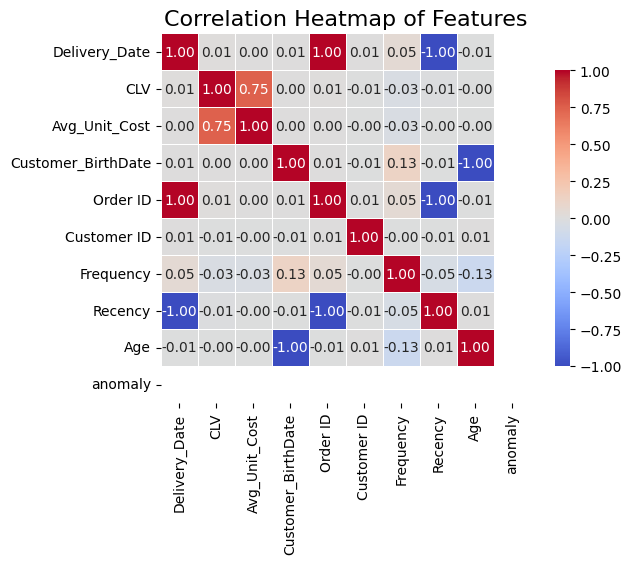

In [ ]:
#Check for multicollinerity:
correlation_matrix = data.corr()
print(correlation_matrix)

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

Multicollinearity checks revealed weak correlations across most features, except for:
1.	Strong positive correlation (0.75) between CLV and Average Unit Cost.
2.	Negative correlation (-0.13) between Age and Frequency


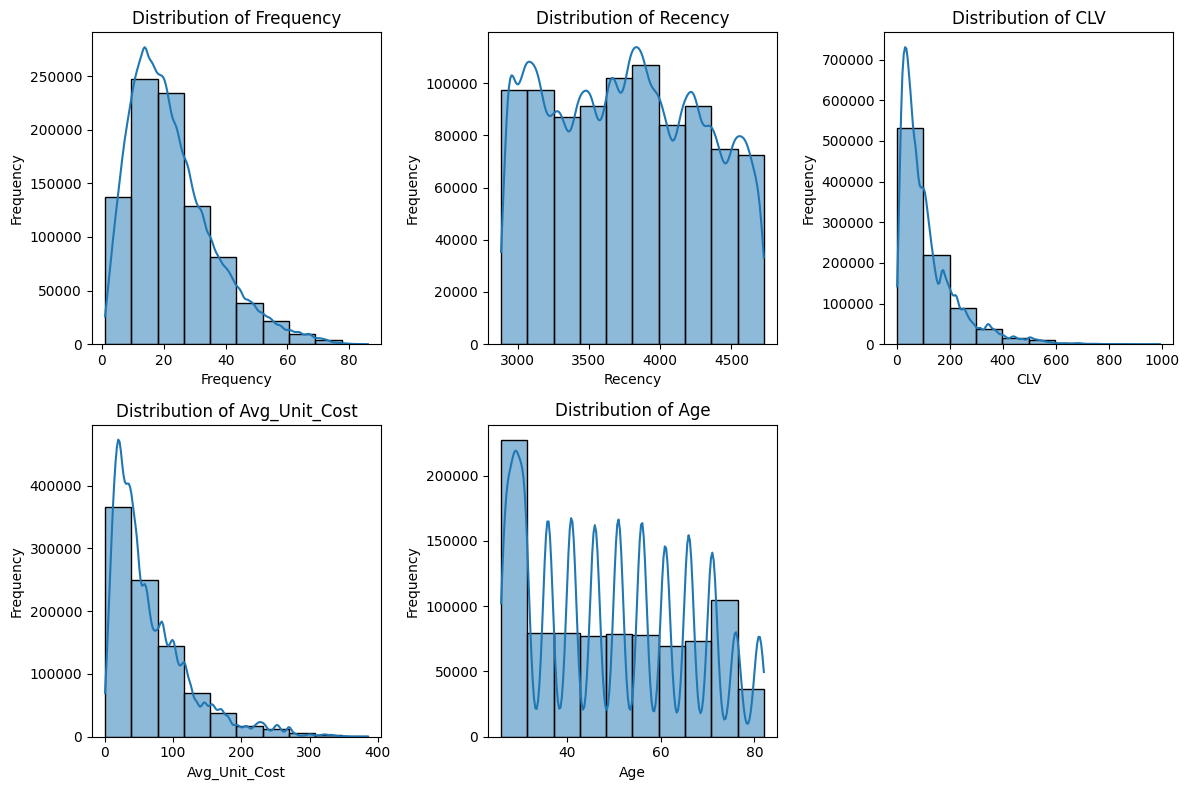

In [ ]:
# Histogram Visualisation for each feature
features_to_plot = ['Frequency', 'Recency', 'CLV', 'Avg_Unit_Cost', 'Age']

# Create histograms for the selected features
plt.figure(figsize=(12, 8))
for i, column in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust to a 2x3 grid layout
    sns.histplot(data[column], kde=True, bins=10)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The distribution of Recency and Age showed a multimodal distribution, while Frequency and Average Unit Cost had skewed normal distributions.

The Average unit cost is strongly skewed with majoirty of of our data in this feature having a range between 0 and £100,

The age distribution shows that the age range between 40 to 70 has a uniform distribution, but the age range most represented in the data set are below the age of 30.

The frequency distribution shows that majority of the customers in the data set had a purchasing frequency between 20-30

The recency feature distribution shows a uniform distribution



### **Data Aggregation**

**Data Aggregation:** Since each row in our dataset represents a purchase  we need to aggregate our data by CustomerId to enable more insights into customer behaviour

To segment the data, orders were grouped by Customer ID. The following aggregation was performed:

• Sum of CLV per customer.

• Average Frequency per customer.

• Minimum Recency per customer.

• Average Unit Cost per customer.

In [ ]:
# Aggregation operations for the features below:
agg_operations = {
    'CLV': 'sum',
    'Frequency': 'mean',
    'Recency': 'min',
    'Avg_Unit_Cost': 'mean',
    'Age': 'first'
}

# Group by Customer ID and aggregate the features
data_aggregated = data.groupby('Customer ID').agg(agg_operations).reset_index()

# Display the aggregated DataFrame
print(data_aggregated)

       Customer ID      CLV  Frequency  Recency  Avg_Unit_Cost  Age
0                1  2907.00       35.0     2921      59.703125   71
1                3  2821.00       20.0     3023      90.505000   41
2                4   782.67        9.0     4012      37.195556   41
3                5  2036.18       19.0     2909      75.035294   36
4                6  1604.58       15.0     3094      52.526667   66
...            ...      ...        ...      ...            ...  ...
67964        94248   982.47        6.0     3658      93.250000   41
67965        94250   221.58        4.0     3823      22.666667   27
67966        94252  5095.67       49.0     2951      59.160870   51
67967        94253  1453.20        8.0     3247      74.000000   56
67968        94254   400.80        6.0     3637      32.280000   66

[67969 rows x 6 columns]


#Optimal number of Clusters Analysis

To segment customers effectively, identifying the optimum number of clusters is essential.The
optimum number of clusters was determined using three methods:

1. Elbow Method:
2. Silhouette Score
3. Hierarchical Clustering (Dendrogram)

## Elbow method

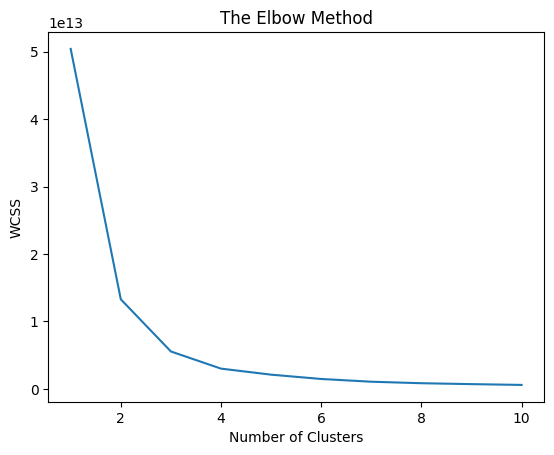

In [ ]:
#To determine optimal cluster number we used a range of different k from 2-10

#Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_aggregated)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph we can see that after k=5 the graph plateus. We can deduce that k=5 is optimal number of clusters from the elbow method.

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score


# Range for number of clusters
range_n_clusters = list(range(2, 11))

# Store Silhouette scores for each cluster count
silhouette_scores = []

# Run K-Means for the range of k (2-11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_aggregated)
    score = silhouette_score(data_aggregated, kmeans.labels_)
    silhouette_scores.append(score)

# Data frame for range of number of clusters and the corresponding silhouette score
silhouette_df = pd.DataFrame({
    'Number of Clusters': range_n_clusters,
    'Silhouette Score': silhouette_scores})

# Show table
print(silhouette_df)

   Number of Clusters  Silhouette Score
0                   2          0.610576
1                   3          0.601372
2                   4          0.584640
3                   5          0.562616
4                   6          0.543189
5                   7          0.532642
6                   8          0.519890
7                   9          0.508520
8                  10          0.495147


The silouette score shows that the smaller the cluster the higher the silouette score. This is incontrast from  the results i got from the elbow method which showed 4 or 5 as the optimum k. This is due to elbow method not capturing how well the clusters are seperated, which the silhouette method does.

## Hierarchical Clustering

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Perform hierarchical clustering without defining k initially
def hierarchical_clustering(data_aggregated, method='average'):
    dists = pdist(data_aggregated, metric='euclidean')
    linkage_matrix = linkage(dists, method=method)
    return linkage_matrix

# Get the linkage matrix
linkage_matrix = hierarchical_clustering(data_aggregated)

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

The elbow method (figure 3)  indicates that k=5 is the optimum number of clusters, after 5 the graph plateus, in the silhouette score method, as the silhouette score indicated that as the number of clusters increased, the score decreased. e dendrogram suggested 4 clusters as the most ideal. This is because it shows the highest vertical distances between merges (horizontal lines) and distinct separations, balancing cluster separation while capturing key features effectively.

Based on these methods, 4 clusters were chosen as the optimal number, balancing complexity and capturing key distinctions.


# Run K-Means Clustering

I then applied K-Means clustering to segment customers based on key behaviour features (CLV, Frequency, Recency, Avg. Unit Cost, Age). I pre-processed the data using StandardScaler and fit the model with 4 clusters to identify distinct customer groups.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Numerical features
numerical_features = ['CLV', 'Frequency', 'Recency', 'Avg_Unit_Cost', 'Age']

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])

# Fit and transform the aggregated data
df_preprocessed = preprocessor.fit_transform(data_aggregated)

# convert back into a DataFrame
df_preprocessed = pd.DataFrame(df_preprocessed, columns=numerical_features)

In [ ]:
 # Segmentation with K-Means
 # Initialize the K-Means algorithm
 kmeans = KMeans(n_clusters=4, random_state=42)

# Create a pipeline that first preprocesses the data and then applies K-Means
 pipeline = Pipeline(steps=[('preprocessor', preprocessor),('clusterer', kmeans)])

 # Fit the pipeline to the data
 pipeline.fit(data_aggregated)

 # Get the cluster assignments
 cluster_labels = pipeline.predict(data_aggregated)

# Customer segments

In [ ]:
#Display the cluster association for each customer ID in table format.
cluster_results = pd.DataFrame({
    'Customer ID': data_aggregated['Customer ID'],
    'cluster_number': cluster_labels
})

print(cluster_results)

       Customer ID  cluster_number
0                1               1
1                3               1
2                4               3
3                5               0
4                6               2
...            ...             ...
67964        94248               0
67965        94250               3
67966        94252               1
67967        94253               2
67968        94254               3

[67969 rows x 2 columns]


We then performed a boxplot analysis to visualize the distribution of key features—Frequency,
Recency, Average Unit Cost, Age, and Customer Lifetime Value (CLV)—across the four customer
clusters.

<Figure size 1500x1000 with 0 Axes>

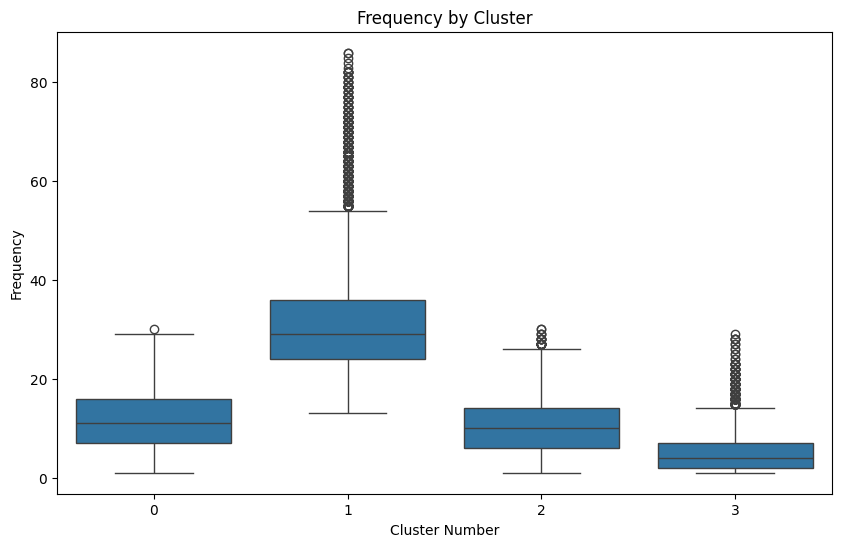

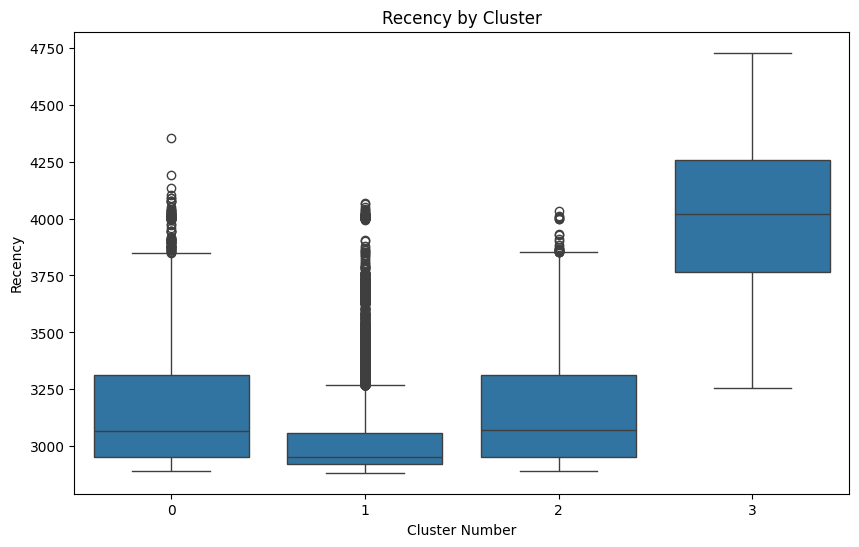

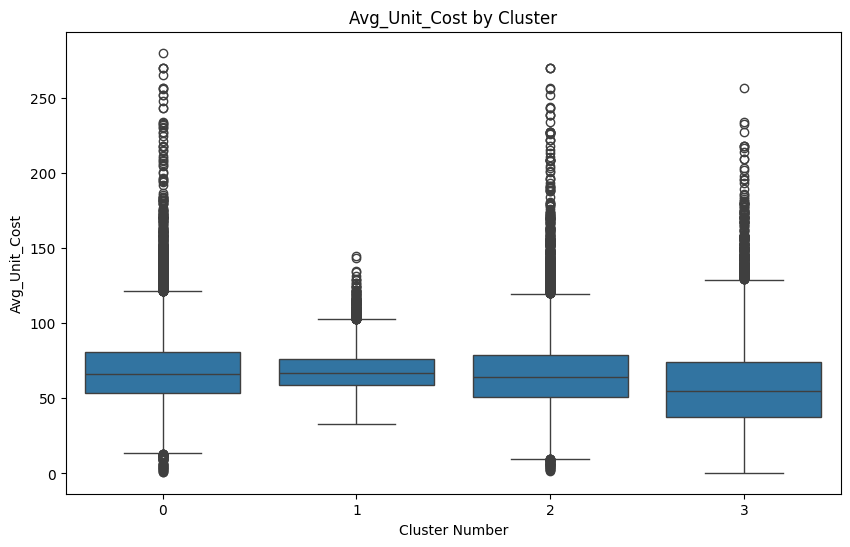

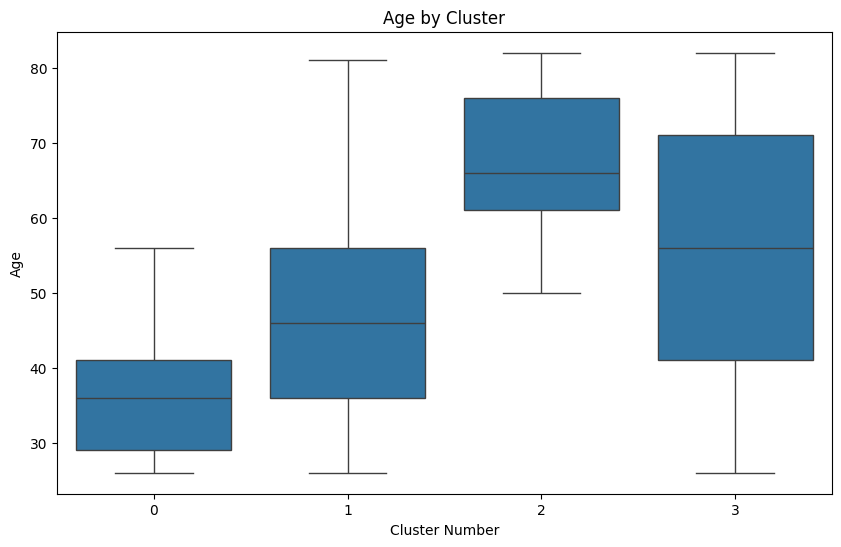

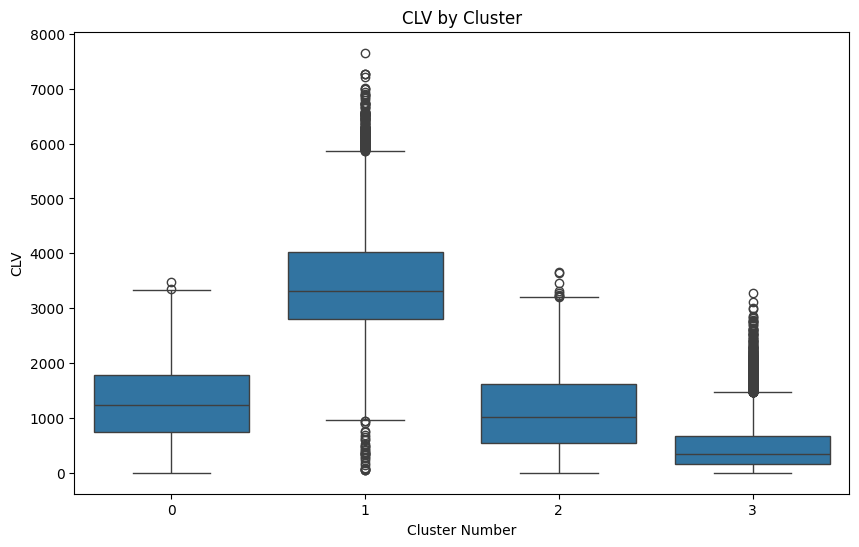

<Figure size 640x480 with 0 Axes>

In [ ]:
# Merge the cluster_results with data_aggregated
data_aggregated = pd.merge(data_aggregated, cluster_results[['Customer ID', 'cluster_number']], on='Customer ID', how='left')

# Convert Age to integer type
data_aggregated['Age'] = data_aggregated['Age'].astype(int)

# Create a figure
plt.figure(figsize=(15, 10))

# features to plot
features = ['Frequency', 'Recency', 'Avg_Unit_Cost', 'Age', 'CLV']

# Create boxplot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_number', y=feature, data=data_aggregated)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster Number')
    plt.ylabel(feature)
    plt.show()

# show the boxplot
plt.tight_layout()
plt.show()

feature aggregation methods have introduce new extreme value.

# PCA and t-SNE Visualisation

### PCA visualisation for 4 number clusters

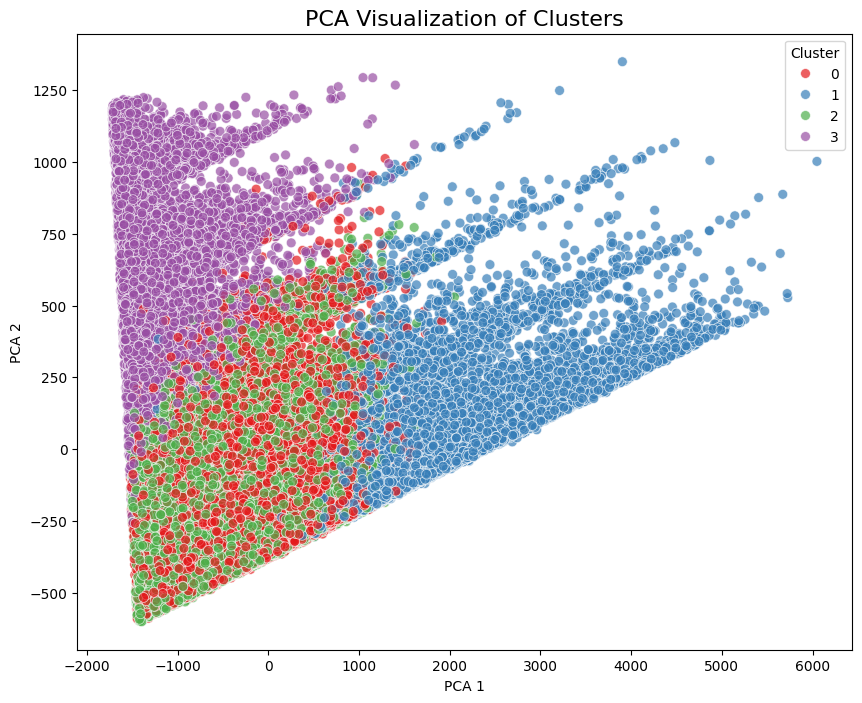

In [ ]:
from sklearn.decomposition import PCA
# features to use in pca dimensional reduction
features_for_pca = data_aggregated[['CLV', 'Frequency', 'Recency', 'Avg_Unit_Cost', 'Age']]

# Reduce the data to 2 components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(features_for_pca)

# New DataFrame for the PCA results
pca_df = pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])

# Add cluster labels to the PCA DataFrame
pca_df['cluster_number'] = data_aggregated['cluster_number']

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_number', data=pca_df, palette='Set1', s=50, alpha=0.7)
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

From the PCA visualization, the data appears mostly clustered within their respective groups. However, there is notable overlap between the red and green clusters, which suggests that these groups are not clearly separated. This observation aligns with the dendrogram, where two linkages are close together and share a merger, compared to the longer distances between the other clusters (see Figure 5 in the report).

### t-SNE visualisation for 4 number clusters

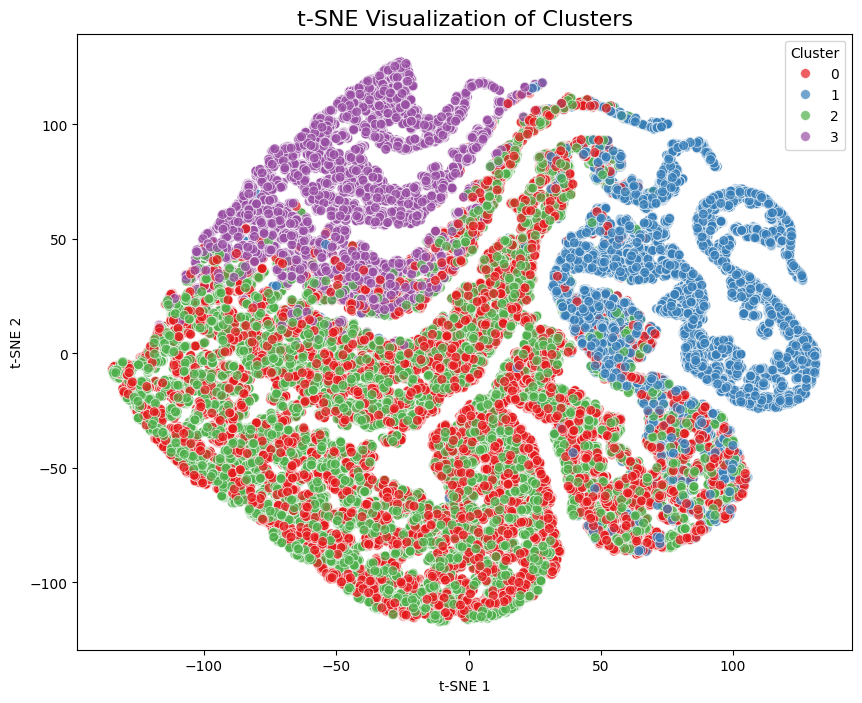

In [ ]:
from sklearn.manifold import TSNE
# features to use in to use for t-SNE
features_for_tsne = data_aggregated[['CLV', 'Frequency', 'Recency', 'Avg_Unit_Cost', 'Age']]

# reduce the data to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_for_tsne)

# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Add cluster labels to the new t-SNE DataFrame
tsne_df['cluster_number'] = data_aggregated['cluster_number']

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster_number', data=tsne_df, palette='Set1', s=50, alpha=0.7)
plt.title('t-SNE Visualization of Clusters', fontsize=16)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

##Thoughts and observations about the dimension reduction techniques are recorded to understand its effectiveness in customer segmentation.

1. t-SNE is computationally intensive and took significantly longer to run compared to PCA, which is a faster and more efficient dimensionality reduction technique for visualizing the data.

2. Clusters are more clearly defined in the t-SNE visualization. The main overlap occurs between the red and green clusters, suggesting that these might represent a single cluster if we chose to reduce the number of clusters to three.

3. In the t-SNE plot, the data points within each cluster are more compact and exhibit less variance compared to PCA. This is because t-SNE focuses on preserving the local relationships between data points, while PCA preserves global variance, making the clusters appear more spread out

## Conclusion

From the boxplot analysis  and t-SNE , please note the following:

- Cluster 1 has the highest median frequency, indicating frequent, engaged customers. In
contrast, Cluster 3 shows the lowest frequency, suggesting less frequent buyers. Clusters
0 and 2 exhibit similar frequency and recency, sitting between Cluster 1 and Cluster 3 in
terms of engagement.

- In terms of recency, Cluster 1 has the lowest median, signalling recent purchases and high
engagement, while Cluster 3 has the highest recency, indicating a longer gap since the last
purchase, which may signal a risk of churn. Clusters 0 and 2 lie in the middle.

- For Avg_Unit_Cost, Clusters 0, 1, and 2 have similar median values, indicating comparable
spending behaviors. Cluster 3 has a slightly lower median but greater variability,
suggesting diverse purchasing behaviors within the group.

- In terms of age, Cluster 3 shows the highest IQR, indicating a broader age range, with both
younger and older customers. Cluster 2 has the highest median age, suggesting older
customers. Its lowest age is higher than that of Clusters 0 and 1. Clusters 0 and 1, with
median ages under 50, are predominantly younger, likely more engaged in frequent, lower
cost purchases. Clusters 2 and 3, with median ages over 50, likely consist of older
customers, requiring tailored marketing strategies.

- Based on t-SNE results, we can assume that Clusters 1 and 3 are the distinct purple and
blue clusters, while Clusters 0 and 2 represent the red and green points that overlap.

## Evaluation

- It would have been more appropriate to use 3 as the number of clusters. This is because in
the visualizations, particularly from t-SNE and PCA, there is significant overlap between the
green and red clusters, which suggests that these groups might share similar
characteristics.

### Reference:
SAS, 2024. CUSTOMERS_CLEAN [Data set]. SAS. Last revised on 15 December 2021. [Accessed 20 February 2024].